In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(61.60249057701236, 111.79266618753962),
 (25.513594484970127, 39.39849700002901),
 (-19.366898381468943, -138.18760904763346),
 (14.337587538580024, -146.9806228036445),
 (-41.81925929192582, -47.144411095641345),
 (35.578918266154005, -39.92480141230655),
 (-57.63468178505339, 26.128400284623922),
 (-21.387354340815833, 112.492796519048),
 (-10.339812033491413, 131.9397358589104),
 (-33.830943559069, 44.22831246769621),
 (-86.68374306647402, -166.78115715834952),
 (-74.66197217114548, 14.687509503474189),
 (-32.381178067701306, -150.75800010713405),
 (79.2960427881932, -33.71270442062922),
 (-2.6477307508494476, 86.70362776701558),
 (46.85270906487824, -4.308586564292142),
 (78.80707822610867, -105.01242885178947),
 (57.787102637782596, -128.7241477351036),
 (38.627856149083954, -24.488612316382103),
 (85.4353739960442, -99.45884139440321),
 (-59.86586407626192, 168.7261571561683),
 (63.579161731743795, 101.11464319433543),
 (-69.24197354780836, 143.48075019581006),
 (-12.9130215887

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = lat_lngs

In [11]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for value in coordinates:
    city = citipy.nearest_city(value[0],value[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chernyshevskiy
Processing Record 2 of Set 1 | umm lajj
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | rocha
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | nguiu
City not found. Skipping...
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | concarneau
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | terrace
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | hobart
Processing Recor

Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | moose factory
Processing Record 39 of Set 4 | buraydah
Processing Record 40 of Set 4 | tateyama
Processing Record 41 of Set 4 | christchurch
Processing Record 42 of Set 4 | klyuchi
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | sabha
Processing Record 45 of Set 4 | bulalacao
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | evensk
Processing Record 49 of Set 4 | felipe carrillo puerto
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | tawkar
City not found. Skipping...
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | rio hato
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | praia
Processing Record 7 of Set 5 | olga
Processing Record 8 of Set 5 | pamekasan
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | aksu
Processing Record 29 of Set 8 | povenets
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | port macquarie
Processing Record 32 of Set 8 | ginda
Processing Record 33 of Set 8 | baie-comeau
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | pontedera
Processing Record 36 of Set 8 | karamay
City not found. Skipping...
Processing Record 37 of Set 8 | baker city
Processing Record 38 of Set 8 | gamba
Processing Record 39 of Set 8 | aswan
Processing Record 40 of Set 8 | gazi
Processing Record 41 of Set 8 | jardim
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | jackson
Processing Record 44 of Set 8 | tazovskiy
Processing Record 45 of Set 8 | ati
Processing Record 46 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 47 of Set 8 | sechura
Processing Record 48 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 49 of Set 8 | tabiauea
City not found. Skipping..

Processing Record 10 of Set 12 | saint-leu
Processing Record 11 of Set 12 | barbar
City not found. Skipping...
Processing Record 12 of Set 12 | jiddah
City not found. Skipping...
Processing Record 13 of Set 12 | aykhal
Processing Record 14 of Set 12 | ankang
Processing Record 15 of Set 12 | vila praia de ancora
Processing Record 16 of Set 12 | bereda
Processing Record 17 of Set 12 | chodavaram
Processing Record 18 of Set 12 | turukhansk
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | bilibino
Processing Record 21 of Set 12 | sydney
Processing Record 22 of Set 12 | bukama
Processing Record 23 of Set 12 | khovu-aksy
Processing Record 24 of Set 12 | parkes
Processing Record 25 of Set 12 | mbale
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | kannangad
Processing Record 28 of Set 12 | calbuco
Processing Record 29 of Set 12 | ancud
Processing Record 30 of Set 12 | northam
Processing Record 31 of Set 12 | shimoni
Processing Record 32 of Set 12

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chernyshevskiy,63.0128,112.4714,21.99,82,100,7.76,RU,2021-10-14 05:05:07
1,Umm Lajj,25.0213,37.2685,84.13,66,0,4.76,SA,2021-10-14 05:05:07
2,Rikitea,-23.1203,-134.9692,74.55,74,80,6.71,PF,2021-10-14 05:05:08
3,Hilo,19.7297,-155.0900,73.26,97,100,8.08,US,2021-10-14 05:05:09
4,Rocha,-34.4833,-54.3333,60.46,99,99,2.91,UY,2021-10-14 05:05:09
5,Ribeira Grande,38.5167,-28.7000,67.57,88,100,17.34,PT,2021-10-14 05:05:10
6,Kruisfontein,-34.0033,24.7314,65.88,57,64,17.67,ZA,2021-10-14 05:05:10
7,Carnarvon,-24.8667,113.6333,83.55,36,0,6.38,AU,2021-10-14 05:05:11
8,Mataura,-46.1927,168.8643,52.12,56,99,6.26,NZ,2021-10-14 05:05:11
9,Bredasdorp,-34.5322,20.0403,61.29,79,48,15.93,ZA,2021-10-14 05:05:12


In [14]:
column_reorder = ["City","Country","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [15]:
city_data_df = city_data_df[column_reorder]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chernyshevskiy,RU,63.0128,112.4714,21.99,82,100,7.76
1,Umm Lajj,SA,25.0213,37.2685,84.13,66,0,4.76
2,Rikitea,PF,-23.1203,-134.9692,74.55,74,80,6.71
3,Hilo,US,19.7297,-155.0900,73.26,97,100,8.08
4,Rocha,UY,-34.4833,-54.3333,60.46,99,99,2.91
...,...,...,...,...,...,...,...,...
558,Bharatpur,IN,27.2167,77.4833,88.70,20,0,7.25
559,Tigil,RU,57.8000,158.6667,35.55,67,97,11.39
560,Mandera,KE,3.9366,41.8670,79.52,60,78,8.86
561,Vila,PT,42.0304,-8.1588,50.32,35,0,3.78


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

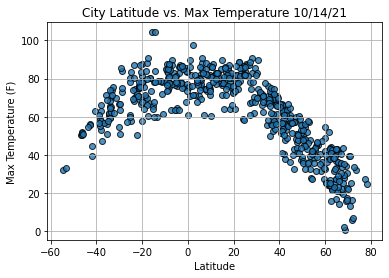

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

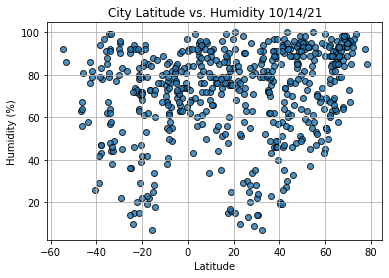

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

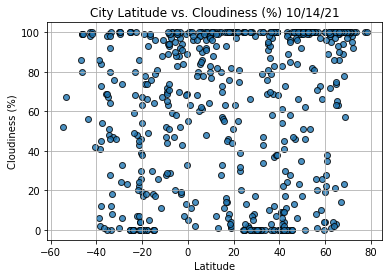

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()